In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# import seaborn as sns

In [2]:
# sns.set_theme(style="whitegrid")
# # sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("paper")

## Addition

In [44]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df#.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Addition_Original,32,0,2622.950420,2.7736,4.30,11926.480,11278.686806
1,Addition_Original,32,200,2500.646407,3.5584,4.27,15194.368,10677.760158
2,Addition_Original,32,250,2500.646407,2.8447,3.98,11321.906,9952.572700
3,Addition_Original,32,300,2622.009612,3.0962,3.33,10310.346,8731.292008
4,Addition_Original,32,350,2885.904018,3.1989,2.86,9148.854,8253.685491
5,Addition_Original,32,400,2940.940819,3.3232,2.50,8308.000,7352.352047
6,Addition_Original,32,450,3102.758422,3.6948,2.22,8202.456,6888.123697
7,Addition_Original,32,500,3642.542436,4.6944,2.00,9388.800,7285.084872
8,Addition_Original,32,550,3887.856033,5.2689,1.82,9589.398,7075.897980
9,Addition_Original,32,600,4106.121641,5.6517,1.67,9438.339,6857.223140


In [45]:
area_df = adder_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design Addition_Original Addition_HUB
Freq.                                
0            2622.950420  2434.555221
200          2500.646407  2390.102410
250          2500.646407  2390.102410
300          2622.009612  2416.915211
350          2885.904018  2525.577616

In [46]:
# adder_df = adder_df.loc[adder_df['Freq.'] != 0.0].loc[adder_df['Freq.']%1 == 0.0]
# Remove non-constrained case
adder_df = adder_df[adder_df["Freq."]!=0]

area_df = adder_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = adder_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design Addition_Original Addition_HUB
Freq.                                
200          2500.646407  2390.102410
250          2500.646407  2390.102410
300          2622.009612  2416.915211
350          2885.904018  2525.577616
400          2940.940819  2661.758424

In [47]:
# Percentage gain and loss
area_gain = (area_df['Area']['Addition_Original'].values - area_df['Area']['Addition_HUB'].values) / area_df['Area']['Addition_Original'].values
power_gain = (power_df['Power']['Addition_Original'].values - power_df['Power']['Addition_HUB'].values) / power_df['Power']['Addition_Original'].values
delay_gain = (delay_df['Delay']['Addition_Original'].values - delay_df['Delay']['Addition_HUB'].values) / delay_df['Delay']['Addition_Original'].values
energy_gain = (energy_df['Energy']['Addition_Original'].values - energy_df['Energy']['Addition_HUB'].values) / energy_df['Energy']['Addition_Original'].values
adp_gain = (ADP_df['ADP']['Addition_Original'].values - ADP_df['ADP']['Addition_HUB'].values) / ADP_df['ADP']['Addition_Original'].values

# print('        [ 8 bits   | 16 bits  | 32 bits  ]')
# print('area  :', area_gain)
# print('power :', power_gain)
# print('delay :', delay_gain)
# print('energy:', energy_gain)
# print('adp:   ', adp_gain)
# area_gain

In [48]:
# Percentage gain and loss
area_gain = 100 * area_df['Area']['Addition_HUB'] / area_df['Area']['Addition_Original']
power_gain = 100 * power_df['Power']['Addition_HUB'] / power_df['Power']['Addition_Original']
delay_gain = 100 * delay_df['Delay']['Addition_HUB'] / delay_df['Delay']['Addition_Original']
energy_gain = 100 * energy_df['Energy']['Addition_HUB'] / energy_df['Energy']['Addition_Original']
adp_gain = 100 * ADP_df['ADP']['Addition_HUB'] / ADP_df['ADP']['Addition_Original']


<Figure size 1000x500 with 0 Axes>

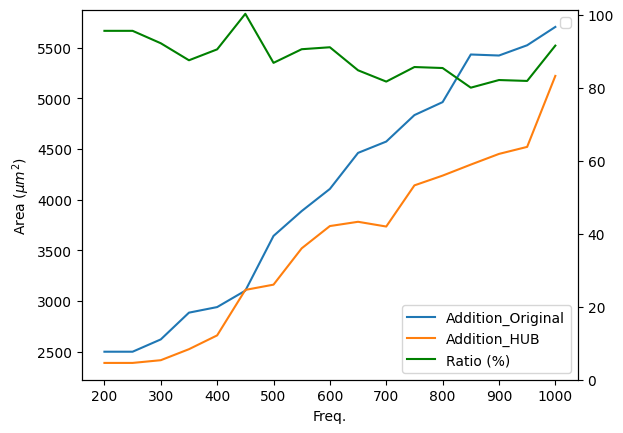

In [49]:
fig=plt.figure(figsize=(10,5))

ax1 = area_df.plot.line(
	y="Area",
	rot = 0,
	ylabel=r"Area ($\mu m^2$)",
)

ax2 = ax1.twinx()

ax2 = area_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')


plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

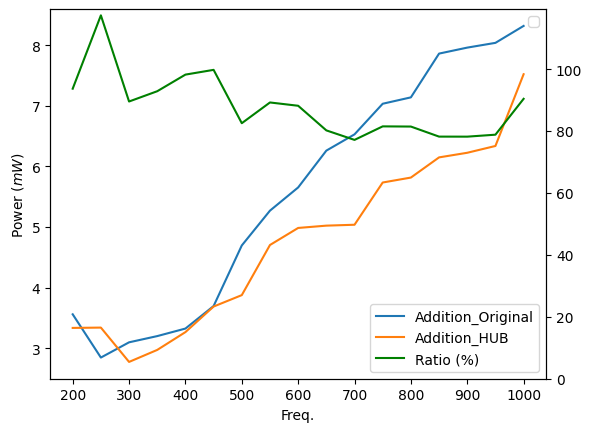

In [50]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel=r"Power ($mW$)"
)

ax2 = ax1.twinx()

ax2 = power_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='lower right')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

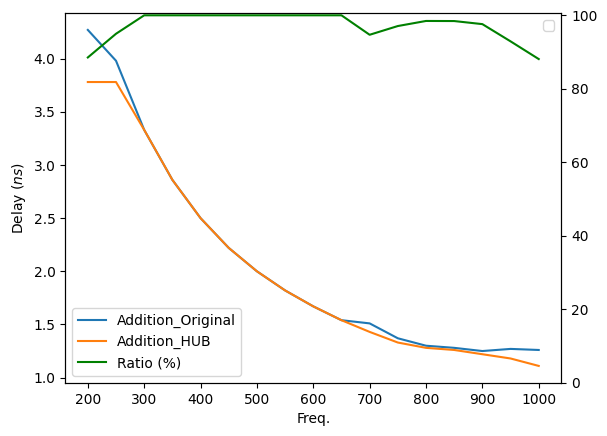

In [51]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel=r"Delay ($ns$)"
)

ax2 = ax1.twinx()

ax2 = delay_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

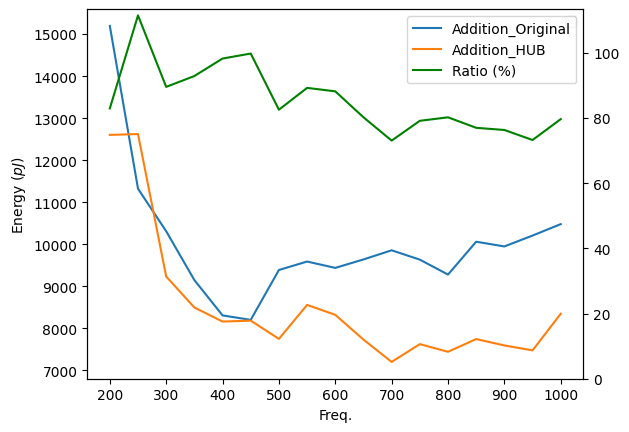

In [52]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel=r"Energy ($pJ$)"
)

ax2 = ax1.twinx()

ax2 = energy_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

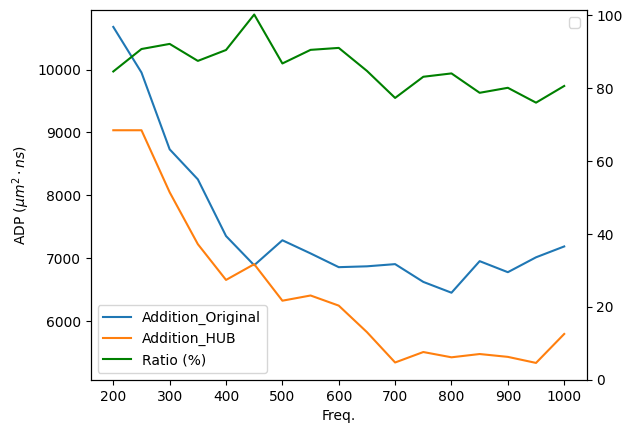

In [53]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
    y="ADP",
    rot = 0,
    ylabel=r"ADP ($\mu m^2 \cdot ns$)"
)

ax2 = ax1.twinx()

ax2 = adp_gain.plot.line(
	rot = 0,
	# ylabel="%",
	ax=ax2,
	color='g',
	label="Ratio (%)"
)
ax2.set_ylim(0)

# Plot legends together
ax1.legend('')
handles,labels = [],[]
for ax in [ax1, ax2]:
	for h,l in zip(*ax.get_legend_handles_labels()):
		handles.append(h)
		labels.append(l)
plt.legend(handles, labels, loc='best')

plt.grid(False, axis="x")
plt.show()

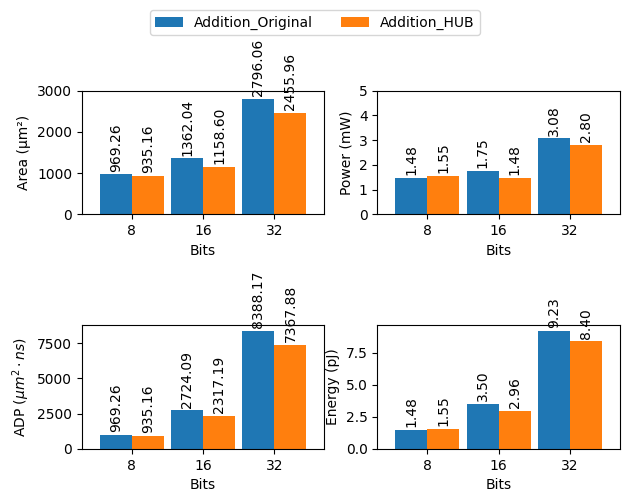

In [60]:
!mkdir -p figs

fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
axs[0,0].set_yticks(np.arange(0,4000,1000))
# Display values
axs[0,0].bar_label(axs[0,0].containers[0], padding=2, rotation = 90, fmt='%.2f')
axs[0,0].bar_label(axs[0,0].containers[1], padding=2, rotation = 90, fmt='%.2f')

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
axs[0,1].set_yticks(np.arange(0,6,1))
# Display values
axs[0,1].bar_label(axs[0,1].containers[0], padding=2, rotation = 90, fmt='%.2f')
axs[0,1].bar_label(axs[0,1].containers[1], padding=2, rotation = 90, fmt='%.2f')

##########3
# delay_df.plot.bar(ax=axs[1,0], legend=False,
#                  y="Delay",
#                  rot = 0,
#                  ylabel="Delay (ns)",
#                  width=0.9
# )
# axs[1,0].grid(False, axis="x")
# # Display values
# axs[1,0].bar_label(axs[1,0].containers[0], padding=2, rotation = 90, fmt='%.2f')
# axs[1,0].bar_label(axs[1,0].containers[1], padding=2, rotation = 90, fmt='%.2f')
#############
ADP_df.plot.bar(ax=axs[1,0], legend=False,
                 y="ADP",
                 rot = 0,
                 ylabel="ADP ($\mu m^2 \cdot ns$)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
# Display values
axs[1,0].bar_label(axs[1,0].containers[0], padding=2, rotation = 90, fmt='%.2f')
axs[1,0].bar_label(axs[1,0].containers[1], padding=2, rotation = 90, fmt='%.2f')

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
axs[1,1].bar_label(axs[1,1].containers[0], padding=2, rotation = 90, fmt='%.2f')
axs[1,1].bar_label(axs[1,1].containers[1], padding=2, rotation = 90, fmt='%.2f')

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

plt.savefig("figs/adder.pdf", bbox_inches="tight")
plt.show()

## Multiplication

In [54]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,Multiplication_Original,32,0,7468.305652,14.1893,3.46,49094.978,25840.337556
1,Multiplication_Original,32,200,7544.980847,14.7186,3.53,51956.658,26633.782390
2,Multiplication_Original,32,250,7544.980847,14.7290,3.53,51993.370,26633.782390
3,Multiplication_Original,32,300,7555.329648,13.9037,3.33,46299.321,25159.247728
4,Multiplication_Original,32,350,8145.446484,15.1352,2.85,43135.320,23214.522479


In [16]:
area_df = mult_df[["Area", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Bits"]].groupby(["Design", "Bits"], sort=False).sum().unstack(0)

area_df.head()

Area                   
Design Multiplication_Original Multiplication_HUB
Bits                                             
8                  1382.976011        1432.838414
16                 2230.636824        2157.489617
32                 8322.316908        8056.540866

In [17]:
area_gain = (area_df['Area']['Multiplication_Original'].values - area_df['Area']['Multiplication_HUB'].values) / area_df['Area']['Multiplication_Original'].values
power_gain = (power_df['Power']['Multiplication_Original'].values - power_df['Power']['Multiplication_HUB'].values) / power_df['Power']['Multiplication_Original'].values
delay_gain = (delay_df['Delay']['Multiplication_Original'].values - delay_df['Delay']['Multiplication_HUB'].values) / delay_df['Delay']['Multiplication_Original'].values
energy_gain = (energy_df['Energy']['Multiplication_Original'].values - energy_df['Energy']['Multiplication_HUB'].values) / energy_df['Energy']['Multiplication_Original'].values

print('        [ 8 bits   | 16 bits  | 32 bits  ]')
print('area  :', area_gain)
print('power :', power_gain)
print('delay :', delay_gain)
print('energy:', energy_gain)

        [ 8 bits   | 16 bits  | 32 bits  ]
area  : [-0.03605442  0.03279207  0.03193534]
power : [-0.01108156  0.00125996  0.01573739]
delay : [0.05660377 0.         0.        ]
energy: [0.04614947 0.00125996 0.01573739]


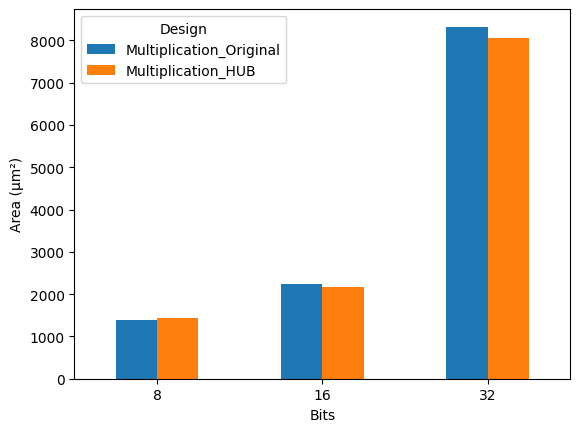

In [18]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

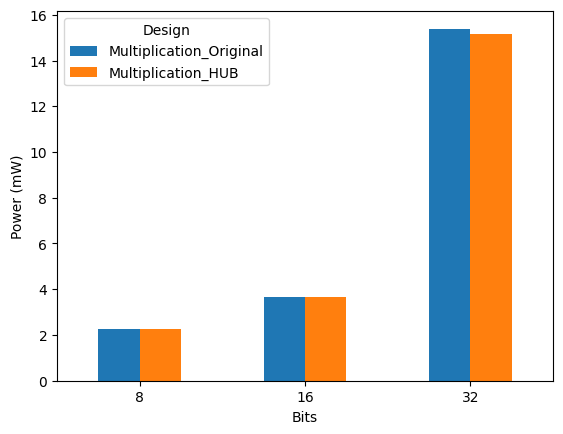

In [19]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

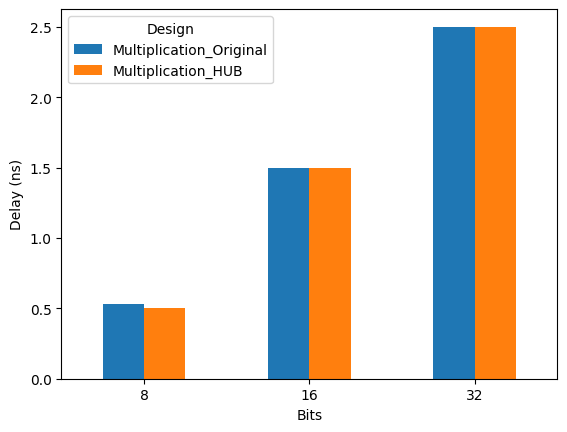

In [20]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

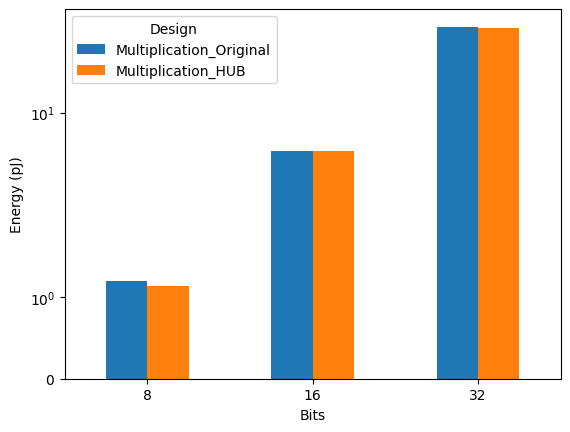

In [21]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

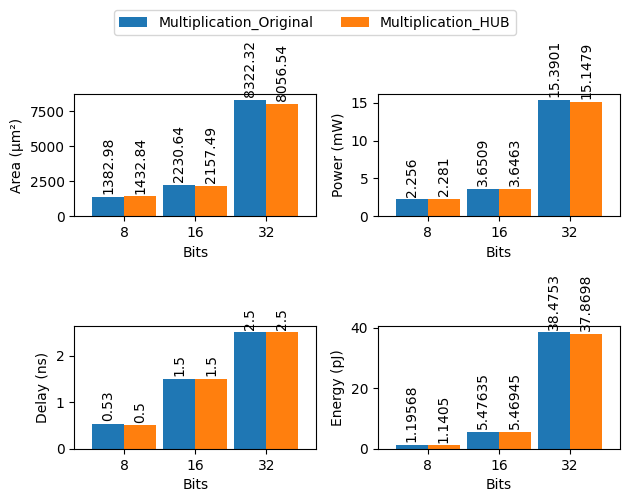

In [22]:
!mkdir -p figs

fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)",
                 width=0.9
)
axs[0,0].grid(False, axis="x")
# axs[0,0].set_yticks(np.arange(0,4000,1000))
# Display values
axs[0,0].bar_label(axs[0,0].containers[0], padding=2, rotation = 90)
axs[0,0].bar_label(axs[0,0].containers[1], padding=2, rotation = 90)

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)",
                 width=0.9
)
axs[0,1].grid(False, axis="x")
# axs[0,1].set_yticks(np.arange(0,6,1))
# Display values
axs[0,1].bar_label(axs[0,1].containers[0], padding=2, rotation = 90)
axs[0,1].bar_label(axs[0,1].containers[1], padding=2, rotation = 90)

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)",
                 width=0.9
)
axs[1,0].grid(False, axis="x")
# axs[1,0].set_yticks(np.arange(0,6,1))
# Display values
axs[1,0].bar_label(axs[1,0].containers[0], padding=2, rotation = 90)
axs[1,0].bar_label(axs[1,0].containers[1], padding=2, rotation = 90)

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)",
                 width=0.9
)
axs[1,1].grid(False, axis="x")
# Display values
axs[1,1].bar_label(axs[1,1].containers[0], padding=2, rotation = 90)
axs[1,1].bar_label(axs[1,1].containers[1], padding=2, rotation = 90)

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.pdf", bbox_inches="tight")
plt.show()